In [7]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_action(s, w):
    return 1 if s @ w > 0 else 0

In [9]:
def play_one_episode(env, params):
    observation, info = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = get_action(observation, params)
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        done = terminated or truncated 
    return total_reward


In [10]:
def play_multiple_episodes(env, num_episodes, params):
    episode_rewards = [play_one_episode(env, params) for _ in range(num_episodes)]
    avg_reward = np.mean(episode_rewards)
    print(f"Average Reward: {avg_reward}")
    return np.mean(episode_rewards)

In [11]:
def random_search(env):
    total_rewards = []
    best = 0
    params = None
    for _ in range(100):
        new_params = np.random.random(4) * 2 - 1
        reward = play_multiple_episodes(env, 100, new_params)
        total_rewards.append(reward)

        if(reward >  best):
            params = new_params
            best = reward
    return params, total_rewards

In [12]:
env = gym.make("CartPole-v1")
params, total_rewards = random_search(env)

Average Reward: 9.45
Average Reward: 9.78
Average Reward: 24.95
Average Reward: 29.88
Average Reward: 55.62
Average Reward: 9.08
Average Reward: 23.81
Average Reward: 34.42
Average Reward: 9.24
Average Reward: 9.24
Average Reward: 9.64
Average Reward: 9.62
Average Reward: 20.75
Average Reward: 9.38
Average Reward: 97.09
Average Reward: 353.75
Average Reward: 205.37
Average Reward: 9.53
Average Reward: 9.11
Average Reward: 9.18
Average Reward: 9.28
Average Reward: 8.94
Average Reward: 65.22
Average Reward: 8.75
Average Reward: 8.92
Average Reward: 19.94
Average Reward: 9.27
Average Reward: 9.38
Average Reward: 9.11
Average Reward: 9.44
Average Reward: 276.1
Average Reward: 9.07
Average Reward: 9.18
Average Reward: 9.21
Average Reward: 360.28
Average Reward: 220.08
Average Reward: 9.78
Average Reward: 9.31
Average Reward: 9.06
Average Reward: 42.9
Average Reward: 49.14
Average Reward: 9.23
Average Reward: 137.8
Average Reward: 84.49
Average Reward: 9.11
Average Reward: 9.28
Average Rewar

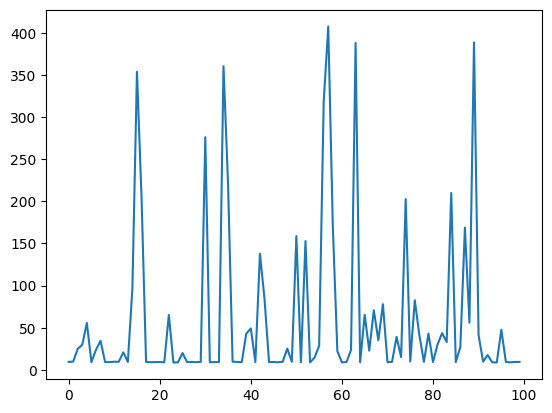

In [13]:
plt.plot(total_rewards)

In [14]:
# rewards should increase overtime, but because is all random its not :)

In [15]:
print("Final round")
play_multiple_episodes(env, 100, params)

Final round
Average Reward: 409.27


np.float64(409.27)